In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import sys
import NR_a1_utils as utils 
from importlib import reload
reload(utils)

<module 'NR_a1_utils' from '/home/vbuchem/Documents/numerical_recipes/numerical_recipes/NR_a1_utils.py'>

In [11]:
seed = 42
print('Original seed:',seed)

Original seed: 42


In [133]:

# Poisson distribution
a1 = [[1,0],[5,10],[3,20],[2.6,40]]#,[101,200]]
for i in range(len(a1)):
    print(utils.poisson_distribution(a1[i][0],a1[i][1]))
a1 = [[1,0],[5,10],[3,20],[2.6,40],[101,200]]
#a1 = [[101,200]]
print('I hate my life')
for i in range(len(a1)):
    print(utils.poisson_distribution_new(a1[i][0],a1[i][1]))


0.36787944117144233
1.8871331317208108e-05
4.618166957543835e-18
6.717133577841115e-49
I hate my life
3.678794423162496e-10
1.8132788720354457e-07
7.135378789264076e-12
3.615124017838137e-38
1.2695314379023172e-18


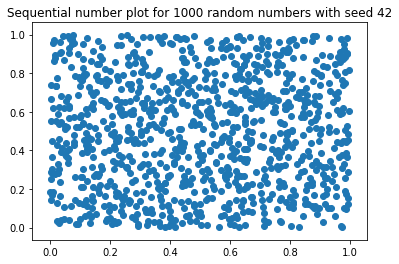

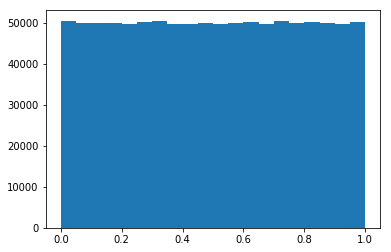

In [12]:
#--- 1.b ---
# RNG 
rng = utils.rng(seed)
# Scatter plot
N = 1000 
rand = rng.rand_num(N)
plt.scatter(rand[:(len(rand)-1)],rand[1:])
plt.title('Sequential number plot for {} random numbers with seed {}'.format(1000,seed))
plt.show()
# Histogram
N = 1000000
rand = rng.rand_num(N)
plt.hist(rand,bins=20,range=(0,1))
plt.show()

In [13]:
#--- 2.a --- 
a = rng.rand_num(1,min=1.1,max=2.5)
b = rng.rand_num(1,min=0.5,max=2)
c = rng.rand_num(1,min=1.5,max=4)
f = lambda x: 4*np.pi* (x**(a-1))/(b**(a-3)) *np.exp(-(x/b)**c)
f_int = utils.romber_int(f,0,5)
A = 1/f_int 
print('A = {}; a,b,c = {},{},{}'.format(A,float(a),float(b),float(c)))
A = 0.03

A = 0.030593520989952466; a,b,c = 1.1903851299778927,1.4978073527317217,1.548543135201585


In [14]:
#--- 2.c --- 
n = lambda x: A*100*(x/b)**(a-3)*np.exp(-(x/b)**c)
x = b
dndx = utils.ridders_diff(n,np.array([b]))
dndx_analitic = lambda x: (A*100) * (((a-3)*(x/b)**(a-4)*np.exp(-(x/b)**c))/b - ((c*np.exp(-(x/b)**c)*(x/b)**(a+c-4))/b)) 
dndx_an = dndx_analitic(x)
print('dn/dx at x = b: analytic = {0:.12f}; numerical = {1:.12f}'.format(float(dndx_an),float(dndx)))


dn/dx at x = b: analytic = -2.474411588528; numerical = -2.474411588537


/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


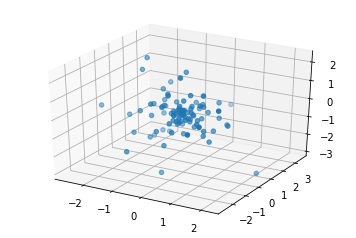

In [15]:
#--- 2.d --- 
N = 100
xmax = 5
# Drawing random samples from n(x)
pn = lambda x: (n(x)*4*np.pi*x**2)/100
x_p = np.linspace(0,xmax,200)
g = np.max(pn(x_p)[1:])+0.01
samples = utils.rejection_sampler(N,pn,5,g,rng)
r = samples[0]
# Generating random angles: 
phi = rng.rand_num(N,min=0,max=2*np.pi)
theta = np.arccos(2*rng.rand_num(N)-1)
x,y,z = r*np.sin(theta)*np.cos(phi),r*np.sin(theta)*np.sin(phi),r*np.cos(theta)
# Plotting positions for N galaxies
ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x,y,z)
plt.show()

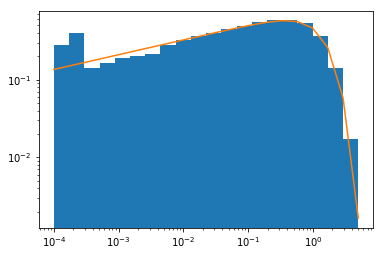

In [17]:
#--- 2.e --- 
N = 100000
samples = utils.rejection_sampler(N,pn,5,g,rng)
r = samples[0]
bins = np.logspace(np.log10(1e-4),np.log10(xmax),num=21)
plt.hist(r,bins=bins,density=True)
plt.plot(bins,pn(bins))
plt.yscale('log')
plt.xscale('log')
plt.show()

/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


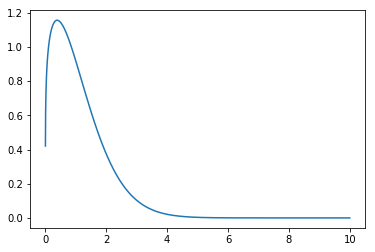

/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


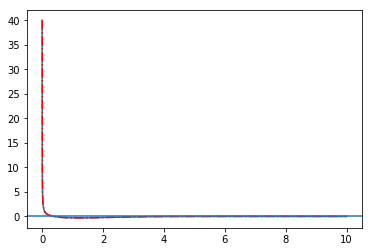

/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


0.3869184059800736
Roots: 0.005325620802258034 1.5775751090955077


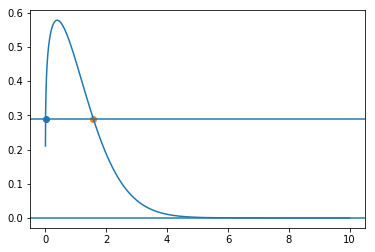

In [64]:
reload(utils)
#--- 2.f --- 
x = np.linspace(0,xmax*2,10000)
plt.plot(x,2*pn(x))
#plt.yscale('log')
#plt.xscale('log')
plt.show()

dpndx = utils.ridders_diff(pn,x)
dpndx_analytic = lambda x: A*4*np.pi*(np.exp(-(x/b)**c)*(((a-1)*b**(3-a)*x**(a-2))-(c*b**(2-a)*x**(a-1)*(x/b)**(c-1))))

plt.plot(x,dpndx)
plt.plot(x,dpndx_analytic(x),color='r',linestyle='-.')
plt.axhline(y=0)
plt.show()

dpndx_0 = float(utils.NewRaph_rootfinder(dpndx_analytic,1e-4,1,rng))
print(dpndx_0)
new_floor = float(pn(dpndx_0)/2)
pn_new_floor = lambda x: pn(x) - new_floor
root1 = float(utils.NewRaph_rootfinder(pn_new_floor,1e-4,dpndx_0,rng))
root2 = float(utils.NewRaph_rootfinder(pn_new_floor,dpndx_0,5,rng))
print('Roots:', root1,root2)
plt.scatter(root1,new_floor)
plt.scatter(root2,new_floor)
plt.plot(x,pn(x))
plt.axhline(y=0)
plt.axhline(y=new_floor)
plt.show()

25.667
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]
[2.5368193672644755e-07, 2.2703339819433255e-07, 1.856746604344116e-07, 1.3979246797290912e-07, 9.75007932710586e-08, 6.33387745931741e-08, 3.850393874549564e-08, 2.199382211156062e-08, 1.1847724288698323e-08, 6.038277076923869e-09, 2.9200731166117124e-09, 1.343417331128214e-09, 5.893746906598902e-10, 2.4709810680613045e-10, 9.919690521457835e-11, 3.8199726659852054e-11, 1.4134361129114288e-11, 5.032816825479131e-12, 1.7269558443543321e-12, 5.718193290274697e-13, 1.8292662181535364e-13, 5.660216791863615e-14, 1.69587121858285e-14, 4.924848763773567e-15, 1.3875330538290564e-15, 3.796035870811128e-16, 1.0092945267176663e-16, 2.610057631823489e-17, 6.5698010979463364e-18, 1.6107664619203819e-18, 3.849316985779274e-19, 8.971879320548226e-20, 2.0407800313844038e-20, 4.5328756145698075e-21, 9.836856910541385e-22, 2.0867627144790332e-22]
3.8

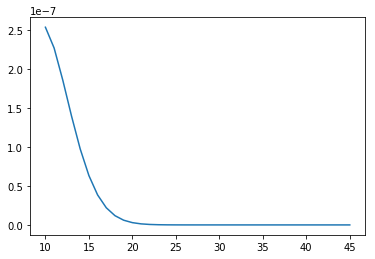

In [136]:
reload(utils)
#--- 2.g ---

# Manually remake bins (without plt.hist)
counts = np.zeros((len(bins)-1))
for i in r: 
    for j in range(len(bins)-1):
        if i < bins[j+1] and i > bins[j]:
            counts[j] += 1
r_list = []
r_halo_distrib = np.zeros((1000))
for i in range(len(r)):
    if r[i] < bins[utils.arg_max(counts)+1] and r[i] > bins[utils.arg_max(counts)]:
        r_list.append(r[i])
        r_halo_distrib[i//100] += 1
mean = sum(r_halo_distrib)/len(r_halo_distrib)
print(mean)
halo_bins = np.linspace(10,45,36)
print(halo_bins)
poissd = []
for i in range(len(halo_bins)):
    poissd.append(utils.poisson_distribution(mean,int(halo_bins[i])))
print(poissd)
print(utils.poisson_distribution(mean,25))
#plt.hist(r_halo_distrib,halo_bins,density=True)
plt.plot(halo_bins,poissd)
plt.show()
#sr = utils.selection_sort(r_list)

Length: 25667, median: 1.292085752641063, 16th: 1.0778016974953895, 84th: 1.5488310360241098


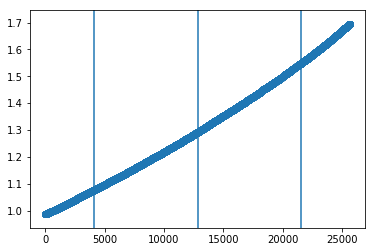

In [112]:
median = sr[int(len(sr)/2-0.5)]
p16th = sr[round(len(sr)*0.16)-1]
p84th = sr[round(len(sr)*0.84)-1]
print('Length: {}, median: {}, 16th: {}, 84th: {}'.format(len(sr),median,p16th,p84th))
x = np.linspace(0,len(sr)-1,len(sr))
plt.scatter(x,sr)
plt.axvline(x=int(len(sr)/2-0.5))
plt.axvline(x=round(len(sr)*0.16)-1)
plt.axvline(round(len(sr)*0.84)-1)
plt.show()